# ARM Quantitative Group project - Autoscout24, Audi A4

Deadline: 12.01.2025, 23.59 Uhr

Unsere Gedanken: Besteht eine Abhängigkeit zwischen dem Antrieb (Allrad, Vorderradantrieb) und dem Preis.

## Libraries and settings

In [79]:
# Libraries
import os
import sqlite3
import fnmatch
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())


# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/project_arm_autoscout_audia1
/workspaces/project_arm_autoscout_audia1


## Import data

In [80]:
## Read data
df = pd.read_csv("./data/as24_a4.csv", sep=",")
df.head()

# Show column names from df
print(df.columns)

# define the columns to keep
colums = ['web-scraper-order',
          'title_raw',
        'price_raw', 
        'mileage_raw',
        'drive_raw',
       'cartype_raw',
       'fuel_raw',
       'ps_raw',
       'fuel_consumption_raw',
       'seller_raw',
       'selleraddress_raw',]

# keep only the columns we are interested in
df = df[colums]

# Show first records of data frame
df.head()

Index(['web-scraper-order', 'title_raw', 'price_raw', 'mileage_raw',
       'drive_raw', 'cartype_raw', 'fuel_raw', 'ps_raw',
       'fuel_consumption_raw', 'seller_raw', 'selleraddress_raw'],
      dtype='object')


,web-scraper-order,title_raw,price_raw,mileage_raw,drive_raw,cartype_raw,fuel_raw,ps_raw,fuel_consumption_raw,seller_raw,selleraddress_raw
0,1734006862-1,AUDI A4 Avant 40 TDI quattro S-tronic,CHF 21'999.–,136'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),6.1 l/100 km,uniAuto AG,"Moosburgstrasse 12, 9200 Gossau"
1,1734006865-2,AUDI A4 Avant 1.4 TFSI Sport S-Tronic,CHF 21'990.–,79'116 km,Vorderradantrieb,Kombi,Benzin,150 PS (110 kW),5.5 l/100 km,Allenmoos Garage GmbH,"Hofwiesenstrasse 268, 8050 Zürich"
2,1734006867-3,AUDI A4 Cabriolet 1.8 Turbo,CHF 7'900.–,100'000 km,Vorderradantrieb,Cabriolet,Benzin,163 PS (120 kW),8.7 l/100 km,Bruno Keller,"Ueberlandstr. 34, 8051 Zürich/ Schwamendingen"
3,1734006869-4,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,CHF 13'900.–,218'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),4.5 l/100 km,PTE GmbH,"Seetalstrasse 44, 6020 Emmenbrücke"
4,1734006872-5,AUDI A4 Avant 40 TDI Sport quattro S-tronic,CHF 27'800.–,107'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),5 l/100 km,Garage Gfeller GmbH,"Unterdorf 1, 8261 Hemishofen"


### 2. Data Preparation

2.1 Count and identify missing values and remove them: 
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW2, Task 2

2.2 Cound and identify duplicates and remove them:
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW2, Task 2

2.3 Create new variables
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW3, Task 1

2.4 Enrich the data with open data
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SWxxx, Task xxx


2. Datenaufbereitung (z. B. Umgang mit fehlenden Werten, Duplikaten etc.):
Zu finden in Woche 02, Aufgabe 2:
- Übungen zur Prüfung und Bereinigung von Daten auf fehlende oder doppelte Werte.



### 2.1 Count numbers of rows and columns

In [81]:
# Dimension (rows, columns)
print('Dimension:', df.shape)

# Number of rows
print('Number of rows:', df.shape[0])

# Number of columns
print('Number of columns:', df.shape[1])

Dimension: (360, 11)
Number of rows: 360
Number of columns: 11


### 2.2 Get data types (raw-format from web scraping)

In [82]:
# Get data types (note that in pandas, a string is referred to as 'object')
df.dtypes

web-scraper-order       object
title_raw               object
price_raw               object
mileage_raw             object
drive_raw               object
cartype_raw             object
fuel_raw                object
ps_raw                  object
fuel_consumption_raw    object
seller_raw              object
selleraddress_raw       object
dtype: object

### 2.3 Extract & save relevant information from raw data using regular expressions (regex)

Extract model of A4

In [83]:
# Extract values from "title_raw" strings
model = []
for i in df['title_raw']:
    # remove "AUDI A4"
    cleaned_str = re.sub(r'AUDI A4', '', i).strip()
    model.append(cleaned_str)

# Save as new variable in the pandas data frame
df['model'] = pd.Series(model, dtype="string")

# Print the first 5 values
print(df['title_raw'].head(5), '\n')
print(df['model'].head(5))

0           AUDI A4 Avant 40 TDI quattro S-tronic
1           AUDI A4 Avant 1.4 TFSI Sport S-Tronic
2                     AUDI A4 Cabriolet 1.8 Turbo
3    AUDI A4 Avant 2.0 TDI Sport quattro S-tronic
4     AUDI A4 Avant 40 TDI Sport quattro S-tronic
Name: title_raw, dtype: object 

0           Avant 40 TDI quattro S-tronic
1           Avant 1.4 TFSI Sport S-Tronic
2                     Cabriolet 1.8 Turbo
3    Avant 2.0 TDI Sport quattro S-tronic
4     Avant 40 TDI Sport quattro S-tronic
Name: model, dtype: string


Extract price

In [84]:
# Extract values from 'price_raw' strings
price = []
for i in df['price_raw']:
    # Remove "CHF" and ".-" and extract numbers
    d1 = re.findall('[0-9\']+', i.replace("CHF", "").replace(".-", ""))
    try:
        d2 = d1[0].replace("'", "")  # remove thousands separator
        d2 = int(d2)  # convert to integer
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="Int64")

# Print first 5 values
print(df['price_raw'].head(5), '\n')
print(df['price'].head(5))

0    CHF 21'999.–
1    CHF 21'990.–
2     CHF 7'900.–
3    CHF 13'900.–
4    CHF 27'800.–
Name: price_raw, dtype: object 

0    21999
1    21990
2     7900
3    13900
4    27800
Name: price, dtype: Int64


Extract mileage

In [85]:
# Extract values from 'mileage_raw' strings
mileage = []
for i in df['mileage_raw']:
    # Remove "km" and extract numbers
    d1 = re.findall('[0-9\']+', i.replace("km", ""))
    try:
        d2 = d1[0].replace("'", "")  # remove thousands separator
        d2 = int(d2)  # convert to integer
    except:
        d2 = None
    mileage.append(d2)

# Save as new variable in the pandas data frame
df['mileage'] = pd.Series(mileage, dtype="Int64")

# Print first 5 values
print(df['mileage_raw'].head(5), '\n')
print(df['mileage'].head(5))

0    136'000 km
1     79'116 km
2    100'000 km
3    218'000 km
4    107'000 km
Name: mileage_raw, dtype: object 

0    136000
1     79116
2    100000
3    218000
4    107000
Name: mileage, dtype: Int64


Extract fuel consumption

In [86]:
# Extract values from 'fuel_consumption_raw' strings
fuel_consumption = []
for i in df['fuel_consumption_raw']:
    # remove "l/100km" and extract numbers
    cleaned_str = re.sub(r'l/100 km', '', i).strip()
    try:
        fuel_value = float(cleaned_str)  # convert to float
    except:
        fuel_value = None
    fuel_consumption.append(fuel_value)

# Save as new variable in the pandas data frame
df['fuel_consumption'] = pd.Series(fuel_consumption)

# Print first 5 values
print(df['fuel_consumption_raw'].head(5), '\n')
print(df['fuel_consumption'].head(5))

0    6.1 l/100 km
1    5.5 l/100 km
2    8.7 l/100 km
3    4.5 l/100 km
4      5 l/100 km
Name: fuel_consumption_raw, dtype: object 

0    6.1
1    5.5
2    8.7
3    4.5
4    5.0
Name: fuel_consumption, dtype: float64


Extract PS

In [87]:
# Extract values from 'ps_raw' strings
ps = []
for i in df['ps_raw']:
    # Remove "PS" und "(xx kW)" und extract numbers
    cleaned_str = re.sub(r'\(.*?\)', '', i).replace("PS", "").strip()
    d1 = re.findall('[0-9\']+', cleaned_str)
    try:
        ps_value = int(cleaned_str)  # convert to integer
    except:
        d2 = None
    ps.append(ps_value)

# Save as new variable in the pandas data frame
df['ps'] = pd.Series(ps, dtype="Int64")

# Print first 5 values
print(df['ps_raw'].head(5), '\n')
print(df['ps'].head(5))

0    190 PS (140 kW)
1    150 PS (110 kW)
2    163 PS (120 kW)
3    190 PS (140 kW)
4    190 PS (140 kW)
Name: ps_raw, dtype: object 

0    190
1    150
2    163
3    190
4    190
Name: ps, dtype: Int64


Get data types of all variables including the new ones

In [88]:
df.dtypes

web-scraper-order               object
title_raw                       object
price_raw                       object
mileage_raw                     object
drive_raw                       object
cartype_raw                     object
fuel_raw                        object
ps_raw                          object
fuel_consumption_raw            object
seller_raw                      object
selleraddress_raw               object
model                   string[python]
price                            Int64
mileage                          Int64
fuel_consumption               float64
ps                               Int64
dtype: object

### 2.4 Count and identify missing values (if any)

In [89]:
# Count missing values
print(pd.isna(df).sum())

# Identify rows with missing values
df[df.isna().any(axis=1)].head()

web-scraper-order       0
title_raw               0
price_raw               0
mileage_raw             0
drive_raw               0
cartype_raw             0
fuel_raw                0
ps_raw                  0
fuel_consumption_raw    0
seller_raw              0
selleraddress_raw       0
model                   0
price                   0
mileage                 0
fuel_consumption        0
ps                      0
dtype: int64


,web-scraper-order,title_raw,price_raw,mileage_raw,drive_raw,cartype_raw,fuel_raw,ps_raw,fuel_consumption_raw,seller_raw,selleraddress_raw,model,price,mileage,fuel_consumption,ps


### 2.5 Count and identify duplicate values

In [90]:
# # Count duplicated values
print(df.duplicated().sum())

# Identify rows with duplicated values, e.g.:
#df[df[['web-scraper-order', 'price_raw', 'address_raw']].duplicated()]

0


### 2.6 Create additional variables

Create new binary (0/1) variable "Sportcar" from the title

In [91]:
# Create a pattern which can be used to search the variable 'title_raw
pattern = 'S-tronic|S-Tronic|Turbo|Sport|S line|S-line|Sline|S-Line'

# Create new variable 'Sportcar' as binary dummy (0/1) variable
df['sportcar'] = df['title_raw'].str.contains(pat = pattern).astype(int)
print(df['sportcar'].sum())

# Show values
df[['title_raw','sportcar']]

233


,title_raw,sportcar
0,AUDI A4 Avant 40 TDI quattro S-tronic,1
1,AUDI A4 Avant 1.4 TFSI Sport S-Tronic,1
2,AUDI A4 Cabriolet 1.8 Turbo,1
3,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,1
4,AUDI A4 Avant 40 TDI Sport quattro S-tronic,1
...,...,...
355,AUDI A4 Avant 40 TDI Attraction quattro S-tronic,1
356,AUDI A4 Avant 2.0 40 TDI quattro S-Tronic,1
357,AUDI A4 Avant 40 TDI,0
358,AUDI A4 Avant 45 TFSI S line S-tronic quattro,1


Create new categorical variable for mileage

In [92]:
# Define classes (labels)
labels = ['0 - 49999', '50000 - 990000', '100000 - 149999', '150000-199999', '200000-249999', '250000-299999', '300000-349999', '350000-399999', '400000-449999', '450000-499999']

# Use the .cut method from pandas to divide the numeric values in classes
df["mileage_cat"] = pd.cut(df['mileage'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000], labels=labels)

# Show original data and classes
print(df[['mileage', 'mileage_cat']])

# Count the frequency of each class and sort them
df['mileage_cat'].value_counts().sort_index()

     mileage      mileage_cat
0     136000  100000 - 149999
1      79116   50000 - 990000
2     100000   50000 - 990000
3     218000    200000-249999
4     107000  100000 - 149999
..       ...              ...
355    44500        0 - 49999
356   133000  100000 - 149999
357    65000   50000 - 990000
358     4800        0 - 49999
359   121700  100000 - 149999

[360 rows x 2 columns]


mileage_cat
0 - 49999          54
50000 - 990000     79
100000 - 149999    80
150000-199999      71
200000-249999      39
250000-299999      21
300000-349999      10
350000-399999       3
400000-449999       3
450000-499999       0
Name: count, dtype: int64

Create new categorical variable for PS

In [93]:
# Define classes (labels)
labels = ['0 - 49', '50-99', '100-149', '150-199', '200-249', '250-299']

# Use the .cut method from pandas to divide the numeric values in classes
df["ps_cat"] = pd.cut(df['ps'], bins=[0, 50, 100, 150, 200, 250, 300], labels=labels)

# Show original data and classes
print(df[['ps', 'ps_cat']])

# Count the frequency of each class and sort them
df['ps_cat'].value_counts().sort_index()

      ps   ps_cat
0    190  150-199
1    150  100-149
2    163  150-199
3    190  150-199
4    190  150-199
..   ...      ...
355  204  200-249
356  204  200-249
357  190  150-199
358  265  250-299
359  160  150-199

[360 rows x 2 columns]


ps_cat
0 - 49       0
50-99        0
100-149     58
150-199    163
200-249     94
250-299     45
Name: count, dtype: int64

Create new categorical variable for "PS"

In [94]:
# Define classes (labels)
labels = ['slow', 'medium', 'fast']

# Use the .cut method from pandas to divide the numeric values in classes
df["ps_cat2"] = pd.cut(df['ps'], bins=[0, 100, 200, 300], labels=labels)

# Show original data and classes
print(df[['ps', 'ps_cat2']])

# Count the frequency of each class and sort them
df['ps_cat2'].value_counts().sort_index()

      ps ps_cat2
0    190  medium
1    150  medium
2    163  medium
3    190  medium
4    190  medium
..   ...     ...
355  204    fast
356  204    fast
357  190  medium
358  265    fast
359  160  medium

[360 rows x 2 columns]


ps_cat2
slow        0
medium    221
fast      139
Name: count, dtype: int64

Create new categorical variable for fuel_consumption

In [95]:
# Define classes (labels)
labels = ['0.00 - 0.99', '1.00-1.99', '2.00-2.99', '3.00-3.99', '4.00-4.99', '5.00-5.99', '6.00-6.99', '7.00-7.99', '8.00-8.99', '9.00-9.99', '10.00-10.99', '11.00-11.99']

# Use the .cut method from pandas to divide the numeric values in classes
df["fuel_consumption_cat"] = pd.cut(df['fuel_consumption'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=labels)

# Show original data and classes
print(df[['fuel_consumption', 'fuel_consumption_cat']])

# Count the frequency of each class and sort them
df['fuel_consumption_cat'].value_counts().sort_index()

     fuel_consumption fuel_consumption_cat
0                 6.1            6.00-6.99
1                 5.5            5.00-5.99
2                 8.7            8.00-8.99
3                 4.5            4.00-4.99
4                 5.0            4.00-4.99
..                ...                  ...
355               5.7            5.00-5.99
356               5.3            5.00-5.99
357               5.5            5.00-5.99
358               7.9            7.00-7.99
359               7.2            7.00-7.99

[360 rows x 2 columns]


fuel_consumption_cat
0.00 - 0.99     0
1.00-1.99       0
2.00-2.99       0
3.00-3.99       3
4.00-4.99      68
5.00-5.99      95
6.00-6.99      72
7.00-7.99      57
8.00-8.99      32
9.00-9.99      23
10.00-10.99     8
11.00-11.99     2
Name: count, dtype: int64

Create new categorical variable for price

In [96]:
# Define classes (labels)
labels = ['0 - 9999', '10000-19999', '20000-29999', '30000-39999', '40000-49999', '50000-59999', '60000-69999', '70000-79999', '80000-89999']

# Use the .cut method from pandas to divide the numeric values in classes
df["price_cat"] = pd.cut(df['price'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], labels=labels)

# Show original data and classes
print(df[['price', 'price_cat']])

# Count the frequency of each class and sort them
df['price_cat'].value_counts().sort_index()

     price    price_cat
0    21999  20000-29999
1    21990  20000-29999
2     7900     0 - 9999
3    13900  10000-19999
4    27800  20000-29999
..     ...          ...
355  31490  30000-39999
356  19900  10000-19999
357  26900  20000-29999
358  71400  70000-79999
359   9599     0 - 9999

[360 rows x 2 columns]


price_cat
0 - 9999       122
10000-19999     89
20000-29999     92
30000-39999     32
40000-49999     12
50000-59999      6
60000-69999      4
70000-79999      3
80000-89999      0
Name: count, dtype: int64

EVTL: Count, identify & remove missing values

In [97]:
# Count missing values
print('Count missing values per variable')
print(pd.isna(df).sum(), '\n')

# Identify rows with missing values
print('Identify rows with missing values')
# Ungültige Spalten
print(df.loc[df.isna().any(axis=1)], '\n')

# Drop rows where at least one element is missing.
df2 = df.dropna()
df2.head()

Count missing values per variable
web-scraper-order       0
title_raw               0
price_raw               0
mileage_raw             0
drive_raw               0
cartype_raw             0
fuel_raw                0
ps_raw                  0
fuel_consumption_raw    0
seller_raw              0
selleraddress_raw       0
model                   0
price                   0
mileage                 0
fuel_consumption        0
ps                      0
sportcar                0
mileage_cat             0
ps_cat                  0
ps_cat2                 0
fuel_consumption_cat    0
price_cat               0
dtype: int64 

Identify rows with missing values
Empty DataFrame
Columns: [web-scraper-order, title_raw, price_raw, mileage_raw, drive_raw, cartype_raw, fuel_raw, ps_raw, fuel_consumption_raw, seller_raw, selleraddress_raw, model, price, mileage, fuel_consumption, ps, sportcar, mileage_cat, ps_cat, ps_cat2, fuel_consumption_cat, price_cat]
Index: []

[0 rows x 22 columns] 



,web-scraper-order,title_raw,price_raw,mileage_raw,drive_raw,cartype_raw,fuel_raw,ps_raw,fuel_consumption_raw,seller_raw,...,price,mileage,fuel_consumption,ps,sportcar,mileage_cat,ps_cat,ps_cat2,fuel_consumption_cat,price_cat
0,1734006862-1,AUDI A4 Avant 40 TDI quattro S-tronic,CHF 21'999.–,136'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),6.1 l/100 km,uniAuto AG,...,21999,136000,6.1,190,1,100000 - 149999,150-199,medium,6.00-6.99,20000-29999
1,1734006865-2,AUDI A4 Avant 1.4 TFSI Sport S-Tronic,CHF 21'990.–,79'116 km,Vorderradantrieb,Kombi,Benzin,150 PS (110 kW),5.5 l/100 km,Allenmoos Garage GmbH,...,21990,79116,5.5,150,1,50000 - 990000,100-149,medium,5.00-5.99,20000-29999
2,1734006867-3,AUDI A4 Cabriolet 1.8 Turbo,CHF 7'900.–,100'000 km,Vorderradantrieb,Cabriolet,Benzin,163 PS (120 kW),8.7 l/100 km,Bruno Keller,...,7900,100000,8.7,163,1,50000 - 990000,150-199,medium,8.00-8.99,0 - 9999
3,1734006869-4,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,CHF 13'900.–,218'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),4.5 l/100 km,PTE GmbH,...,13900,218000,4.5,190,1,200000-249999,150-199,medium,4.00-4.99,10000-19999
4,1734006872-5,AUDI A4 Avant 40 TDI Sport quattro S-tronic,CHF 27'800.–,107'000 km,Allrad,Kombi,Diesel,190 PS (140 kW),5 l/100 km,Garage Gfeller GmbH,...,27800,107000,5.0,190,1,100000 - 149999,150-199,medium,4.00-4.99,20000-29999


In [98]:
# Count duplicated values in the whole data set
print('Sum of missing values:', df.duplicated().sum(), '\n')

# Coount rows
print('Number of rows:', df.shape[0], '\n')

# Identify duplicated values in 'rooms', 'area', 'price'
print('Duplicated values')
print(df.loc[df.duplicated(keep = 'last')])

# Drop the rows with duplicated values
df3 = df2.drop_duplicates()

Sum of missing values: 0 

Number of rows: 360 

Duplicated values
Empty DataFrame
Columns: [web-scraper-order, title_raw, price_raw, mileage_raw, drive_raw, cartype_raw, fuel_raw, ps_raw, fuel_consumption_raw, seller_raw, selleraddress_raw, model, price, mileage, fuel_consumption, ps, sportcar, mileage_cat, ps_cat, ps_cat2, fuel_consumption_cat, price_cat]
Index: []

[0 rows x 22 columns]


Combining data from different sources

In [121]:
## Read data
df3 = pd.read_csv("./data/as24_a4.csv", sep=",")
df.head()

# Show column names from df
print(df.columns)

# define the columns to keep
colums = ['web-scraper-order',
          'title_raw',
          'model',
          'sportcar',
          'price',
          'price_cat',
          'mileage',
          'mileage_cat',
          'drive_raw',
          'cartype_raw',
          'fuel_raw',
          'ps',
          'ps_cat',
          'ps_cat2',
          'fuel_consumption',
          'fuel_consumption_cat',
          'seller_raw',
          'selleraddress_raw']
df = df3[colums]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

Index(['web-scraper-order', 'title_raw', 'model', 'sportcar', 'price',
       'price_cat', 'mileage', 'mileage_cat', 'drive_raw', 'cartype_raw',
       'fuel_raw', 'ps', 'ps_cat', 'ps_cat2', 'fuel_consumption',
       'fuel_consumption_cat', 'seller_raw', 'selleraddress_raw'],
      dtype='object')
(360, 18)


,web-scraper-order,title_raw,model,sportcar,price,price_cat,mileage,mileage_cat,drive_raw,cartype_raw,fuel_raw,ps,ps_cat,ps_cat2,fuel_consumption,fuel_consumption_cat,seller_raw,selleraddress_raw
0,1734006862-1,AUDI A4 Avant 40 TDI quattro S-tronic,Avant 40 TDI quattro S-tronic,1,21999,20000-29999,136000,100000 - 149999,Allrad,Kombi,Diesel,190,150-199,medium,6.1,6.00-6.99,uniAuto AG,"Moosburgstrasse 12, 9200 Gossau"
1,1734006865-2,AUDI A4 Avant 1.4 TFSI Sport S-Tronic,Avant 1.4 TFSI Sport S-Tronic,1,21990,20000-29999,79116,50000 - 990000,Vorderradantrieb,Kombi,Benzin,150,100-149,medium,5.5,5.00-5.99,Allenmoos Garage GmbH,"Hofwiesenstrasse 268, 8050 Zürich"
2,1734006867-3,AUDI A4 Cabriolet 1.8 Turbo,Cabriolet 1.8 Turbo,1,7900,0 - 9999,100000,50000 - 990000,Vorderradantrieb,Cabriolet,Benzin,163,150-199,medium,8.7,8.00-8.99,Bruno Keller,"Ueberlandstr. 34, 8051 Zürich/ Schwamendingen"
3,1734006869-4,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,Avant 2.0 TDI Sport quattro S-tronic,1,13900,10000-19999,218000,200000-249999,Allrad,Kombi,Diesel,190,150-199,medium,4.5,4.00-4.99,PTE GmbH,"Seetalstrasse 44, 6020 Emmenbrücke"
4,1734006872-5,AUDI A4 Avant 40 TDI Sport quattro S-tronic,Avant 40 TDI Sport quattro S-tronic,1,27800,20000-29999,107000,100000 - 149999,Allrad,Kombi,Diesel,190,150-199,medium,5.0,4.00-4.99,Garage Gfeller GmbH,"Unterdorf 1, 8261 Hemishofen"


In [122]:
# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('./data/coordinates.csv')

# Rename columns
df_geo = df_geo.rename(columns={'original_selleraddress_raw':'selleraddress_raw',
                                'lat':'lat_raw',
                                'lon':'lon_raw',
                                'county':'county_raw',})

# Show data
df_geo[['selleraddress_raw',
        'lat_raw',
        'lon_raw',
        'county_raw']].head()

,selleraddress_raw,lat_raw,lon_raw,county_raw
0,"Moosburgstrasse 12, 9200 Gossau",47.418186,9.238559,Wahlkreis St. Gallen
1,"Hofwiesenstrasse 268, 8050 Zürich",47.406712,8.538337,Zurich
2,"Ueberlandstr. 34, 8051 Zürich/ Schwamendingen",47.405098,8.558258,Zurich
3,"Seetalstrasse 44, 6020 Emmenbrücke",47.074116,8.291336,Hochdorf
4,"Unterdorf 1, 8261 Hemishofen",47.676177,8.829603,NaN


In [123]:
df4 = df.merge(df_geo[['selleraddress_raw',
                        'lat_raw',
                        'lon_raw',
                        'county_raw']], 
               on="selleraddress_raw",)
df4.head()

,web-scraper-order,title_raw,model,sportcar,price,price_cat,mileage,mileage_cat,drive_raw,cartype_raw,...,ps,ps_cat,ps_cat2,fuel_consumption,fuel_consumption_cat,seller_raw,selleraddress_raw,lat_raw,lon_raw,county_raw
0,1734006862-1,AUDI A4 Avant 40 TDI quattro S-tronic,Avant 40 TDI quattro S-tronic,1,21999,20000-29999,136000,100000 - 149999,Allrad,Kombi,...,190,150-199,medium,6.1,6.00-6.99,uniAuto AG,"Moosburgstrasse 12, 9200 Gossau",47.418186,9.238559,Wahlkreis St. Gallen
1,1734006865-2,AUDI A4 Avant 1.4 TFSI Sport S-Tronic,Avant 1.4 TFSI Sport S-Tronic,1,21990,20000-29999,79116,50000 - 990000,Vorderradantrieb,Kombi,...,150,100-149,medium,5.5,5.00-5.99,Allenmoos Garage GmbH,"Hofwiesenstrasse 268, 8050 Zürich",47.406712,8.538337,Zurich
2,1734006867-3,AUDI A4 Cabriolet 1.8 Turbo,Cabriolet 1.8 Turbo,1,7900,0 - 9999,100000,50000 - 990000,Vorderradantrieb,Cabriolet,...,163,150-199,medium,8.7,8.00-8.99,Bruno Keller,"Ueberlandstr. 34, 8051 Zürich/ Schwamendingen",47.405098,8.558258,Zurich
3,1734006869-4,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,Avant 2.0 TDI Sport quattro S-tronic,1,13900,10000-19999,218000,200000-249999,Allrad,Kombi,...,190,150-199,medium,4.5,4.00-4.99,PTE GmbH,"Seetalstrasse 44, 6020 Emmenbrücke",47.074116,8.291336,Hochdorf
4,1734006872-5,AUDI A4 Avant 40 TDI Sport quattro S-tronic,Avant 40 TDI Sport quattro S-tronic,1,27800,20000-29999,107000,100000 - 149999,Allrad,Kombi,...,190,150-199,medium,5.0,4.00-4.99,Garage Gfeller GmbH,"Unterdorf 1, 8261 Hemishofen",47.676177,8.829603,NaN


Save data to file

In [99]:
df3.to_csv('./data/as24_a4.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)

Creating a dictionary with e.g. price, antrieb, ps etc.

### 3. Data Storage

3.1 In a database like MySQL or PostgreSQL
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW 2, Task 4

3. Speicherung der Daten in Datenbanken wie SQLite, MySQL oder PostgreSQL:
Zu finden in Woche 02, Aufgabe 4:
- Speicherung und Abfrage von Daten in einer Datenbank mithilfe des Jupyter-Notebooks
`apartments_database_Python.ipynb`.


Create sqlite data base

In [100]:
# Create data base
conn = sqlite3.connect('as24_a4.db') 

# Create cursor object to execute SQL commands
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)


as24_a4.db


In [101]:
cursor.execute('''CREATE TABLE IF NOT EXISTS car_table (
            EntryId INTEGER PRIMARY KEY,
            Title VARCHAR(50),
            Price INTEGER,
            PS INTEGER,
            SellerAddress VARCHAR(200),
            FuelConsumption INTEGER,
            Mileage INTEGER)'''
               )
# Confirm changes to the table
conn.commit()


In [102]:
db_df = df[['title_raw', 'price', 'ps', 'selleraddress_raw','fuel_consumption','mileage']]
db_df.to_sql(name = 'car_table',
          con = conn,
          index = False,
          if_exists = 'replace')

360

In [103]:
cursor.execute('''SELECT *
               FROM car_table
               WHERE Mileage > 100000''')

df_high_mileage = pd.DataFrame(cursor.fetchall(), 
                  columns=['Title','Price','PS','SellerAddress','FuelConsumption','Mileage'])    
df_high_mileage.head()

,Title,Price,PS,SellerAddress,FuelConsumption,Mileage
0,AUDI A4 Avant 40 TDI quattro S-tronic,21999,190,"Moosburgstrasse 12, 9200 Gossau",6.1,136000
1,AUDI A4 Avant 2.0 TDI Sport quattro S-tronic,13900,190,"Seetalstrasse 44, 6020 Emmenbrücke",4.5,218000
2,AUDI A4 Avant 40 TDI Sport quattro S-tronic,27800,190,"Unterdorf 1, 8261 Hemishofen",5.0,107000
3,AUDI A4 Cabriolet 3.0 V6,4900,220,"Althardstrasse 302, 8105 Regensdorf",10.0,154000
4,AUDI A4 Avant 2.0 Turbo FSI quattro,2900,200,"Hauptstrasse 13, 8583 Sulgen",9.1,276000


Close db connection (if open)

In [104]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### 4. Exploratory data analysis (EDA)

4.1 Rich non-graphical and graphical exploratory data analysis (EDA)
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW3, Task 3
- Exercises SW 4, Task 3, 4


4. Explorative Datenanalyse (EDA):
Zu finden in Woche 04, Aufgabe 2:
- Identifikation und Entfernung von Ausreißern sowie Visualisierung von Statistiken und
Verteilungen.

Zu finden in Woche 05, Aufgabe 1:
- Nutzung von Python für grundlegende GIS-Funktionen und die Analyse räumlicher Daten.

Data types

In [125]:
df4.dtypes

web-scraper-order        object
title_raw                object
model                    object
sportcar                  int64
price                     int64
price_cat                object
mileage                   int64
mileage_cat              object
drive_raw                object
cartype_raw              object
fuel_raw                 object
ps                        int64
ps_cat                   object
ps_cat2                  object
fuel_consumption        float64
fuel_consumption_cat     object
seller_raw               object
selleraddress_raw        object
lat_raw                 float64
lon_raw                 float64
county_raw               object
dtype: object

Quantiles original values

In [126]:
df4[['price','mileage', 'fuel_consumption', 'ps']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,mileage,fuel_consumption,ps
0.05,1995.85,11560.0,4.20,150.0
0.10,3230.00,26473.0,4.60,150.0
0.25,8200.00,74500.0,5.30,163.0
0.50,18650.00,122000.0,6.10,190.0
0.75,27990.00,181875.0,7.40,204.0
0.90,35554.00,252300.0,8.60,249.9
0.95,47835.00,298440.0,9.24,265.0


Summary statistics of numeric variables

In [127]:
df4.describe()

,sportcar,price,mileage,ps,fuel_consumption,lat_raw,lon_raw
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.694190,19609.166667,134930.501529,191.888379,6.459327,47.378551,8.654650
std,0.461102,13767.381185,87414.823541,34.734320,1.584138,0.155437,0.288176
min,0.000000,700.000000,5.000000,120.000000,4.000000,46.988528,8.036799
25%,0.000000,8200.000000,74500.000000,163.000000,5.300000,47.276936,8.459938
50%,1.000000,18650.000000,122000.000000,190.000000,6.100000,47.403607,8.661335
75%,1.000000,27990.000000,181875.000000,204.000000,7.400000,47.498113,8.811489
max,1.000000,75900.000000,415000.000000,286.000000,11.300000,47.748866,9.283451


Correlation matrix

In [128]:
corr = df4[['price', 
          'mileage', 
          'fuel_consumption', 
          'ps']].cov().corr()
corr


,price,mileage,fuel_consumption,ps
price,1.000000,-0.997866,-0.999999,0.969601
mileage,-0.997866,1.000000,0.997966,-0.951558
fuel_consumption,-0.999999,0.997966,1.000000,-0.969221
ps,0.969601,-0.951558,-0.969221,1.000000


Covariance matrix

In [129]:
cov = df[['price', 
          'mileage', 
          'fuel_consumption', 
          'ps']].cov()
cov

,price,mileage,fuel_consumption,ps
price,2.036024e+08,-9.513146e+08,-6881.525070,151811.333720
mileage,-9.513146e+08,7.303483e+09,36569.300000,-267051.830084
fuel_consumption,-6.881525e+03,3.656930e+04,2.697939,17.501671
ps,1.518113e+05,-2.670518e+05,17.501671,1339.603335


Creating multiplots with .subplots()

In [106]:
# Get coords for addresses

addresses = df['selleraddress_raw']
addresses.to_csv('./data/addresses.csv')
# Converted via https://www.geoapify.com/tools/geocoding-online/

In [107]:
coordinates = pd.read_csv('./data/coordinates.csv')
df['lat'] = coordinates['lat']
df['lon'] = coordinates['lon']

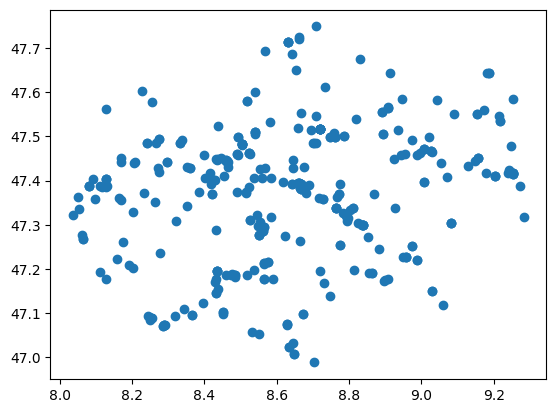

In [108]:
plt.scatter(df['lon'], df['lat'])

In [58]:
# Create a scatter map
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    text="title_raw",
    mapbox_style="open-street-map",
    zoom=8,
    height=800,
    width=800,
    title="Map of Audi A4 cars for sale in and around canton of Zurich",
)

# Show the map
fig.show()

In [ ]:
# Mapbox not available
fig = ff.create_hexbin_mapbox(
    data_frame=df, lat="lat", lon="lon",
    nx_hexagon=10, opacity=0.5, labels={"color": "Number of cars"},
    min_count=1, color_continuous_scale="Viridis",
    show_original_data=True,
    original_data_marker=dict(size=4, opacity=0.6, color="deeppink"),
    mapbox_style="white-bg", height=900, width=900
)
fig.show()

In [ ]:
df[["price", "mileage", "ps", "fuel_consumption"]].describe()

,price,mileage,ps,fuel_consumption
count,360.0,360.0,360.0,360.00000
mean,19076.405556,138281.2,195.097222,6.50000
std,14268.931887,85460.416647,36.600592,1.64254
min,700.0,5.0,120.0,4.00000
25%,7800.0,75075.0,163.0,5.20000
50%,16900.0,127500.0,190.0,6.10000
75%,26923.75,189825.0,211.0,7.60000
max,75900.0,415000.0,286.0,11.30000


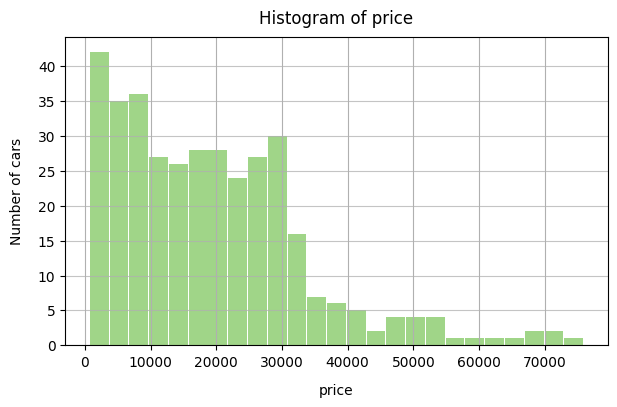

In [ ]:
def plot_histogram(variable: str):
    fig = plt.figure( figsize=(7,4))

    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14, rotation=0)

    n, bins, patches = plt.hist(x=df[variable], 
                                bins=25, 
                                color='#42AD12',
                                alpha=0.5, 
                                rwidth=0.95
                    )
    plt.grid(True)
    plt.ticklabel_format(style='plain')
    plt.grid(axis='y', alpha=0.75)

    # Set labels
    plt.xlabel(variable, fontsize=10, labelpad=10)
    plt.ylabel('Number of cars', fontsize=10, labelpad=10)
    plt.title(f'Histogram of {variable}', fontsize=12, pad=10)

    # Set fontsize of tick labels
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.show()

plot_histogram('price')

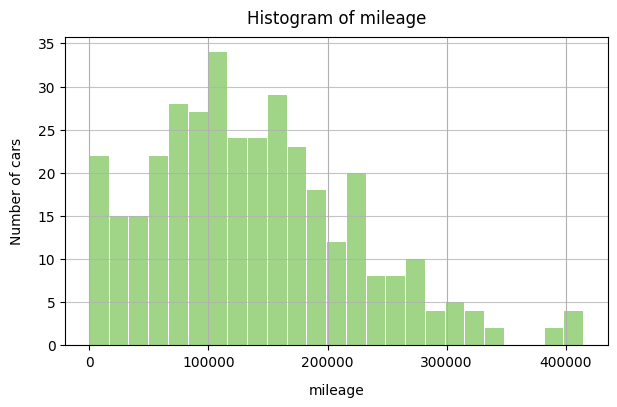

In [ ]:
plot_histogram('mileage')

Text(0.5, 1.0, 'Cars per mileage category')

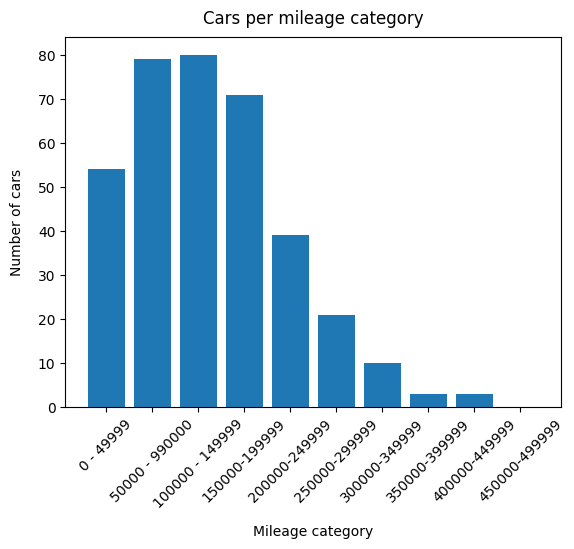

In [ ]:
binned_mileage = df.groupby("mileage_cat").size()
plt.bar(binned_mileage.index, binned_mileage.values)
plt.xticks(rotation=45)
plt.xlabel('Mileage category', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title(f'Cars per mileage category', fontsize=12, pad=10)

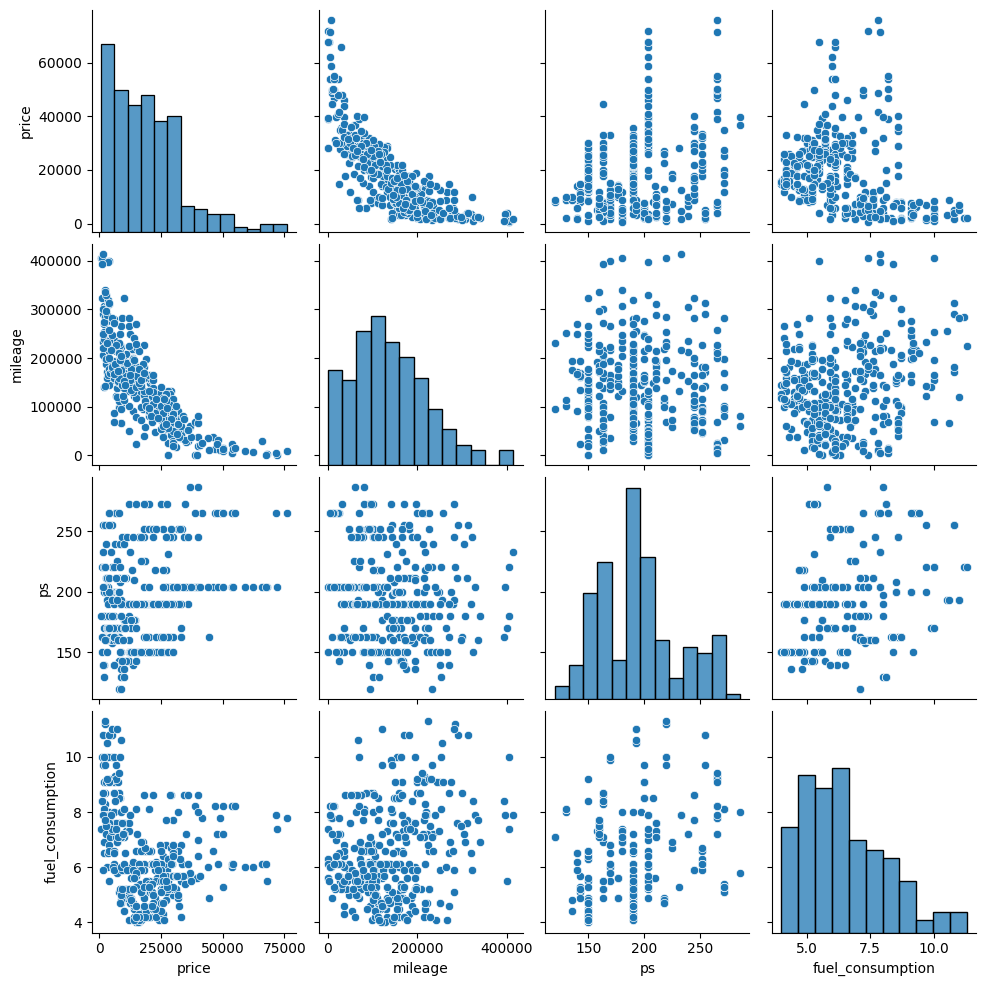

In [ ]:
sns.pairplot(df[["price", "mileage", "ps", "fuel_consumption"]])

In [ ]:
corr = df[["price", "mileage", "ps", "fuel_consumption"]].corr().round(2)
corr

,price,mileage,ps,fuel_consumption
price,1.00,-0.78,0.29,-0.29
mileage,-0.78,1.00,-0.09,0.26
ps,0.29,-0.09,1.00,0.29
fuel_consumption,-0.29,0.26,0.29,1.00


<Axes: >

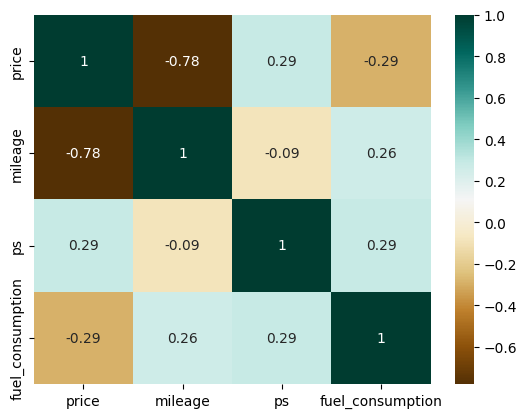

In [ ]:
sns.heatmap(corr, cmap="BrBG", annot=True)

In [38]:
df[["price", "mileage", "ps", "fuel_consumption"]].cov()

,price,mileage,ps,fuel_consumption
price,2.036024e+08,-9.513146e+08,151811.333720,-6881.525070
mileage,-9.513146e+08,7.303483e+09,-267051.830084,36569.300000
ps,1.518113e+05,-2.670518e+05,1339.603335,17.501671
fuel_consumption,-6.881525e+03,3.656930e+04,17.501671,2.697939


In [39]:
def distplot(variable: str):
    plt.figure(figsize=(7,4))
    sns.distplot(df[variable], 
                hist=True, 
                kde=True, 
                bins=20, 
                color = 'green',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 2},
                )
    plt.title(f'Density plot {variable}', fontsize=12, pad=10)
    plt.xlabel(variable, fontsize=12, labelpad=10)
    plt.ylabel('Density', fontsize=12, labelpad=10)
    plt.grid(True)
    plt.show()

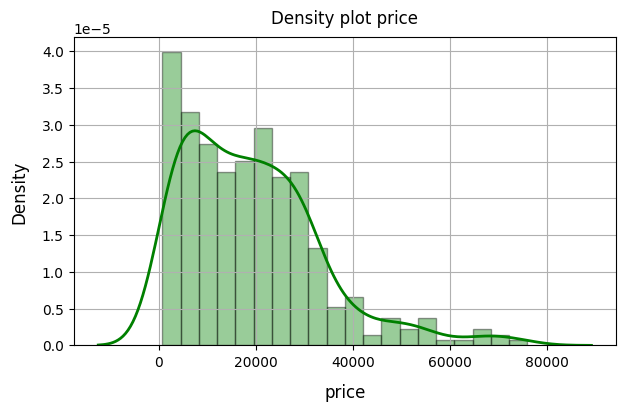

In [ ]:
distplot('price')
# Spline interpolation does not work with values < 0

-0.13x + 37088.21


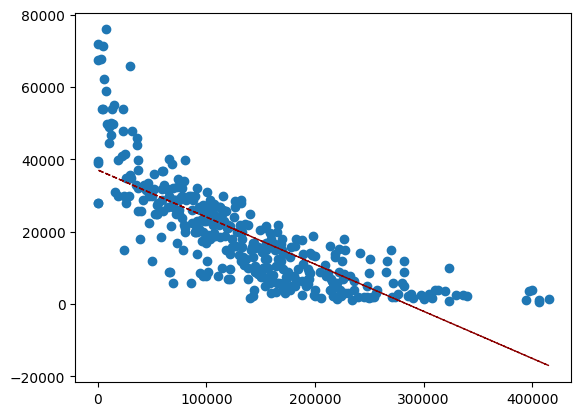

In [ ]:
plt.scatter(df['mileage'], df['price'])
b, a = np.polyfit(df['mileage'], df['price'], 1)
plt.plot(df['mileage'], 
         b*df['mileage'] + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')
print(f"{b.round(2)}x + {a.round(2)}")

0.0x^2 + -0.29x + 46812.74


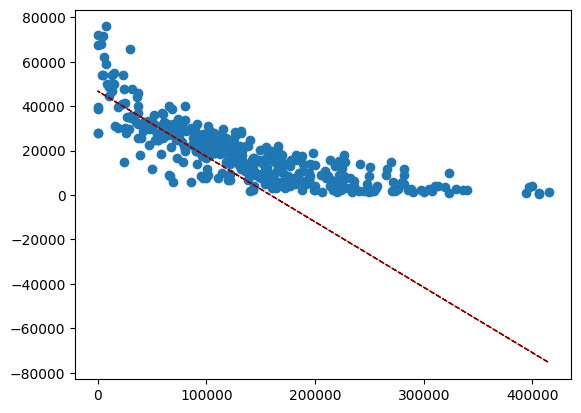

In [ ]:
plt.scatter(df['mileage'], df['price'])
c, b, a = np.polyfit(df['mileage'], df['price'], 2)
plt.plot(df['mileage'], 
         df['mileage']**c + b*df['mileage'] + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')
print(f"{c.round(2)}x^2 + {b.round(2)}x + {a.round(2)}")

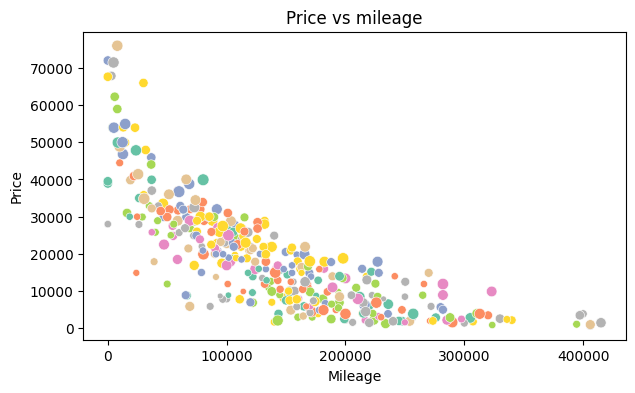

In [132]:
plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="mileage", 
                     y="price",
                     size="ps", # determines bubble size
                     hue="fuel_consumption",  # determines color
                     palette="Set2",
                     data=df)

# Set title and axes
ax.set_title('Price vs mileage', fontsize = 12)
ax.set_xlabel('Mileage', fontsize = 10)
ax.set_ylabel('Price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

In [44]:
df["ps"]

0      190
1      150
2      163
3      190
4      190
      ... 
355    204
356    204
357    190
358    265
359    160
Name: ps, Length: 360, dtype: Int64

<Axes: xlabel='price', ylabel='drive_raw'>

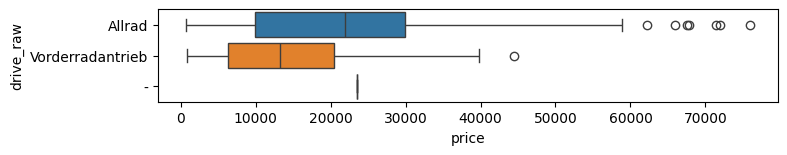

In [ ]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x="price", y="drive_raw", hue="drive_raw")

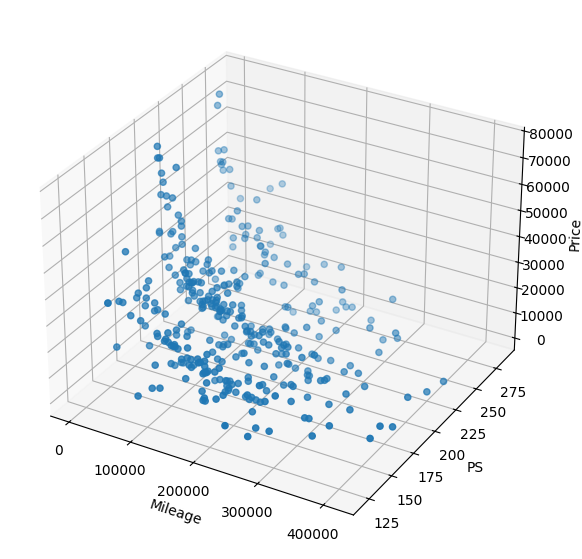

In [ ]:
# Price in dependence of two variables: mileage and ps
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')


ax.scatter(df["mileage"], df["ps"], df["price"], marker="o")

ax.set_xlabel('Mileage')
ax.set_ylabel('PS')
ax.set_zlabel('Price')

plt.show()

In [47]:
# TODO: wird das noch benötigt?
# Define 2x2 subplots and whether x- and y-axes should be shared
# fig, ax = plt.subplots(2, 2, figsize=(7,4), sharex=True, sharey=True)

# ax[0, 0].scatter(x, y, s=100, marker='o', color='orangered') # row=0, col=0
# ax[1, 0].scatter(x, z, s=100, marker='+', color='blue') # row=1, col=0
# ax[0, 1].scatter(x, g, s=100, marker='*', color='deepskyblue') # row=0, col=1
# ax[1, 1].scatter(x, e, s=100, marker='^', color='orange') # row=1, col=1

# # Adding title
# ax[0, 0].set_title('Figure at [0, 0]', fontsize = 12)
# ax[1, 0].set_title('Figure at [1, 0]', fontsize = 12)
# ax[0, 1].set_title('Figure at [0, 1]', fontsize = 12)
# ax[1, 1].set_title('Figure at [1, 1]', fontsize = 12)

# # Adding x-labels
# ax[0, 0].set_xlabel('', fontsize = 10)
# ax[1, 0].set_xlabel('x-label', fontsize = 10)
# ax[0, 1].set_xlabel('', fontsize = 10)
# ax[1, 1].set_xlabel('x-label', fontsize = 10)

# # Adding y-labels
# ax[0, 0].set_ylabel('n-label', fontsize = 10)
# ax[1, 0].set_ylabel('y-label', fontsize = 10)
# ax[0, 1].set_ylabel('', fontsize = 10)
# ax[1, 1].set_ylabel('', fontsize = 10)

# # Set the spacing between subplots
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)

# plt.show()

### 5. Modeling Method

5.1 Use of multiple linear regression, regression tree or random forest regression as the modeling method
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW6, Task 2-5
- Exercises SW7, Task 1-2

5. Verwendung von Modellierungsmethoden (z. B. multiple lineare Regression, Entscheidungsbaum,
Random Forest):
Zu finden in Woche 07, Aufgaben 1 und 2:
- Durchführung von linearer Regression und Analyse von Entscheidungsbäumen sowie Random
Forest.

In [48]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(df['mileage'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
289    166000
336     73750
231    257000
75     159000
194    157000
Name: mileage, dtype: Int64 

y_train:
289    12500
336    34444
231     3900
75      5800
194     9999
Name: price, dtype: Int64


## 5.2 Linear Model

In [49]:
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            37050.86
Slope of regression line (beta):          -0.131
p-value:                                  0.0000
R-squared (coefficient of determination): 0.6268


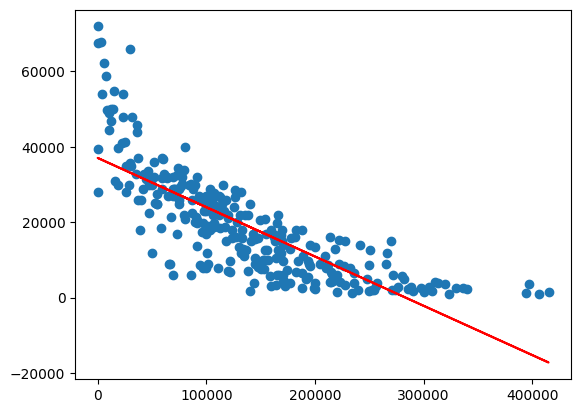

In [ ]:
# Function to calculate model predictions
def linreg(x):
    return slope * x + intercept

# Apply linreg() to x, i.e. make predictions 
y_pred = pd.Series(map(linreg, X_train))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')

In [51]:
residuals = y_train - y_pred

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {y_pred[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 15335.15
1st Observed price in dataset: 21999.00
1st Residual price in dataset: 6663.85


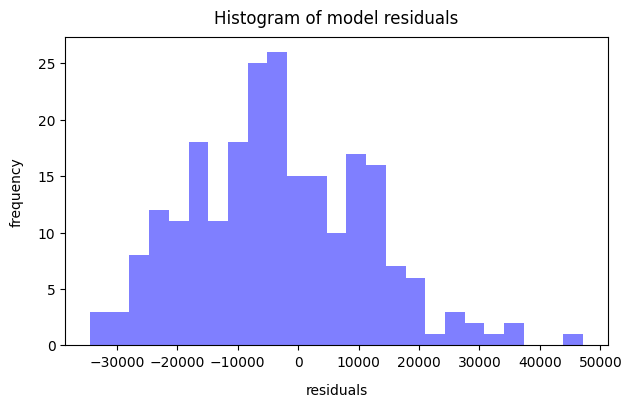

In [ ]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

In [53]:
# TODO: copy and paste examples from linear_regression (week 7)

In [ ]:
# Analysis using statsmodels (but still linear regression)
res = sm.OLS(y_train, sm.add_constant(X_train.to_list())).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     480.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           3.67e-63
Time:                        13:59:49   Log-Likelihood:                -3017.4
No. Observations:                 288   AIC:                             6039.
Df Residuals:                     286   BIC:                             6046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.705e+04    966.226     38.346      0.0

### 6. Model evaluation

6.1 Model evaluation using suitable measures of fit (e.g. r-squared, rmse)
- Vorlesungunterlagen SWxxx, Slide XXX
- - Exercises SW7, Task 1-2


6. Modellevaluation (z. B. R-Quadrat, RMSE):
Zu finden in Woche 07, Aufgabe 1 (b, c):
- Evaluation der Modelle mithilfe von R-Quadrat und Residuen.


### 7. Interpretation

7.1 Correct interpretation of model results and measures of fit
- Vorlesungunterlagen SWxxx, Slide XXX
- Exercises SW7, Task 2


7. Korrekte Interpretation von Modellergebnissen und Gütemaßen:
Zu finden in Woche 07, Aufgaben 1 und 2:
- Interpretation der Ergebnisse in den Bereichen lineare Regression und Random Forest.


8. Bereitstellung der Materialien in Jupyter-Notebooks:
In allen Wochen enthalten:
- Jede Aufgabe verlangt die Einreichung von Jupyter-Notebooks als `.html`-Dateien mit
entsprechenden Erklärungen.

1. Kreativität der Umsetzung:
- Hängt davon ab, wie einzigartig und innovativ du die Aufgaben kombinierst und erweiterst.
2. Verwendung von MySQL- oder PostgreSQL-Datenbanken:
Zu finden in Woche 02, Aufgabe 4:
- Standardmäßig wird SQLite verwendet, die Anpassung auf MySQL/PostgreSQL könnte jedoch
Kreativität zeigen.
3. Integration und Visualisierung geografischer Daten:
Zu finden in Woche 05, Aufgaben 1 und 3:
- GIS-Funktionen und Analyse nächster Nachbarn.
4. Verwendung des Chi-Quadrat-Tests oder ANOVA:
Zu finden in Woche 06, Aufgaben 3 und 4:
- Aufgaben mit Fokus auf einseitige Varianzanalyse (ANOVA) und Chi-Quadrat-Tests.
5. Verwendung von mehr als einem Modell für Vorhersagen:
Zu finden in Woche 07, Aufgaben 1 und 2:
- Einsatz von mehreren Modellen wie linearer Regression und Random Forest.
Projektpräsentation in Videoform (Maximal 3 Punkte):
Die Präsentation sollte den Inhalt und die Struktur der oben genannten Aufgaben klar und
überzeugend darstellen.

In [55]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-30 13:59:49
Python Version: 3.11.10
-----------------------------------
